In [1]:

import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv

class data_dctf(Dataset):
    def __init__(self, t):
        self.t = t
    
    def __len__(self):
        return self.t
    
    def __getitem__(self, idx):
        return torch.LongTensor([idx])
    
if __name__ =="__main__":
    dataset = data_dctf(t=5)
    print(len(dataset))
    it = iter(dataset)
    
    for i in range(10):
        print(i, next(it))
        


5
0 tensor([0])
1 tensor([1])
2 tensor([2])
3 tensor([3])
4 tensor([4])
5 tensor([5])
6 tensor([6])
7 tensor([7])
8 tensor([8])
9 tensor([9])


In [2]:
import pandas as pd
import torch
import glob
import re
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader

# labels_map = {
#    0: ".\\data_img\\dog*.PNG",
 #   1: ".\\data_img\\cat*.PNG",
  #  2: ".\\data_img\\tiger*.PNG",
   # 3: ".\\data_img\\frog*.PNG",
#}
   # Use glob to find all files matching the pattern
file_paths = (glob.glob(".\\data_img\\dog*.PNG")
+ glob.glob(".\\data_img\\cat*.PNG") 
+ glob.glob(".\\data_img\\tiger*.PNG")
+ glob.glob(".\\data_img\\frog*.PNG"))
    # Create DataFrame from file paths
df = pd.DataFrame({'file_path': file_paths})


# 정규식을 사용하여 숫자를 제거
df['label'] = df['file_path'].apply(lambda x: x.split('\\')[-1].split('.')[0])
pattern = r'\d+'
df['label'] = df['label'].apply(lambda x: re.sub(pattern, '',x ))
    # Save DataFrame to CSV
df.to_csv("my_label.csv", index=False)


epoch : 0 
torch.Size([1, 4, 595, 685]) tensor([2])


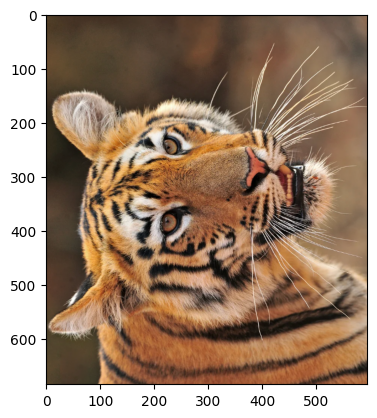

torch.Size([1, 4, 551, 674]) tensor([0])


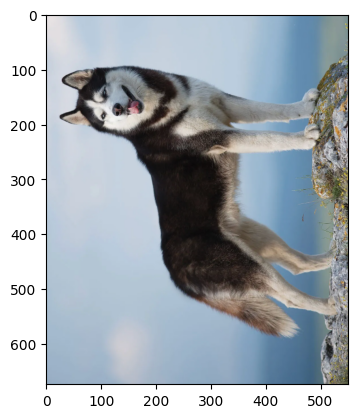

torch.Size([1, 4, 487, 697]) tensor([0])


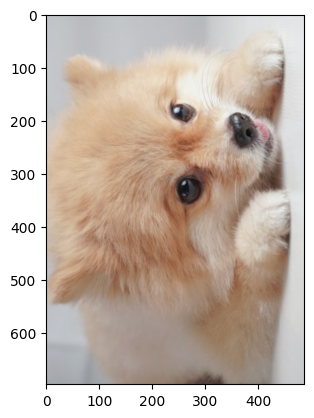

torch.Size([1, 4, 551, 647]) tensor([2])


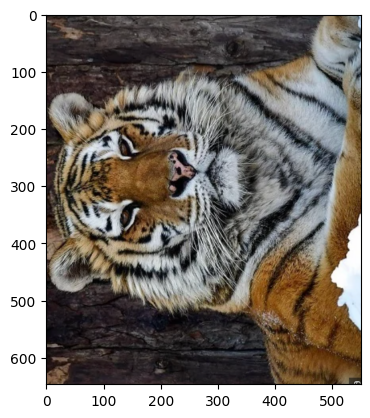

torch.Size([1, 4, 554, 671]) tensor([3])


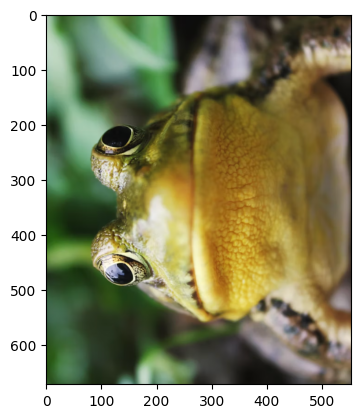

torch.Size([1, 4, 613, 752]) tensor([3])


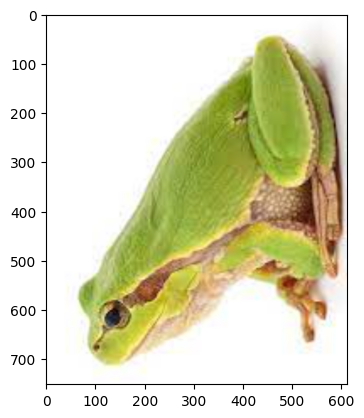

torch.Size([1, 4, 340, 600]) tensor([1])


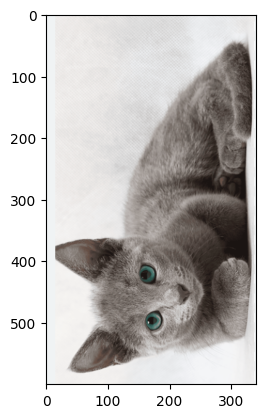

torch.Size([1, 4, 719, 794]) tensor([1])


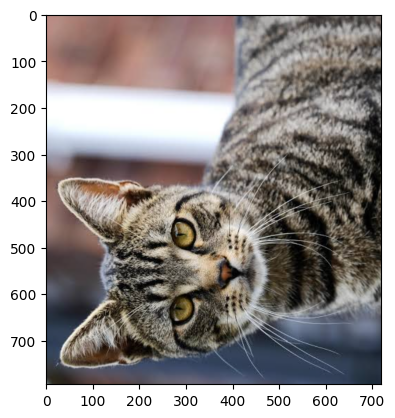

epoch : 1 
torch.Size([1, 4, 613, 752]) tensor([3])


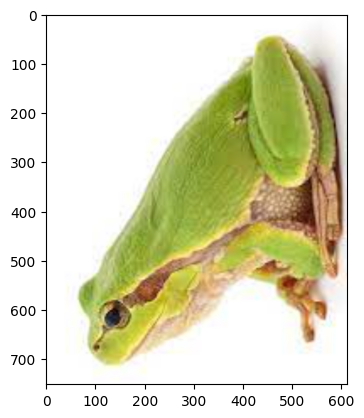

torch.Size([1, 4, 487, 697]) tensor([0])


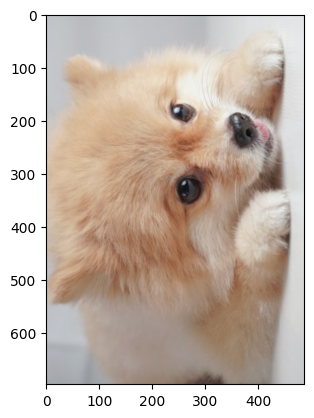

torch.Size([1, 4, 551, 674]) tensor([0])


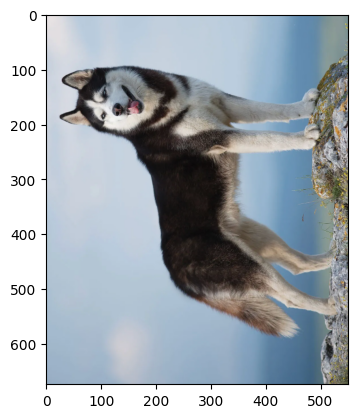

torch.Size([1, 4, 554, 671]) tensor([3])


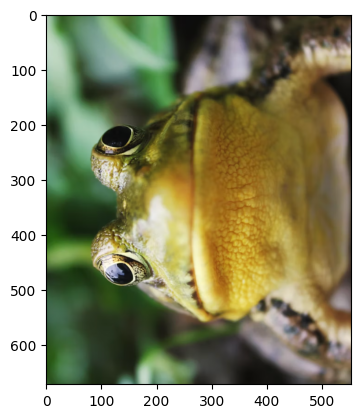

torch.Size([1, 4, 719, 794]) tensor([1])


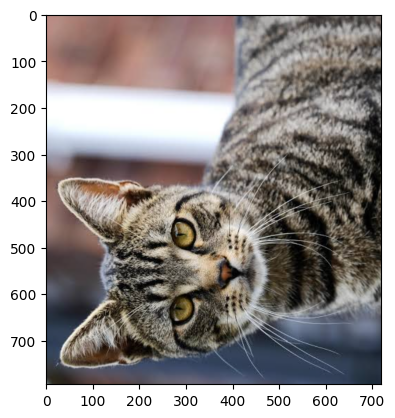

torch.Size([1, 4, 340, 600]) tensor([1])


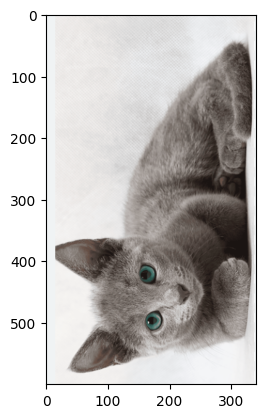

torch.Size([1, 4, 551, 647]) tensor([2])


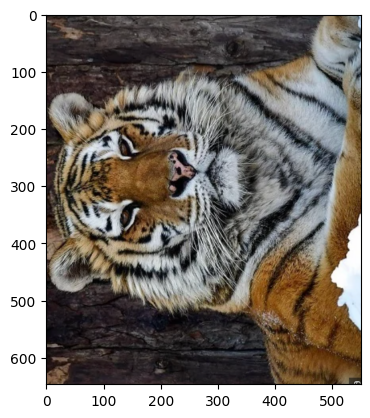

torch.Size([1, 4, 595, 685]) tensor([2])


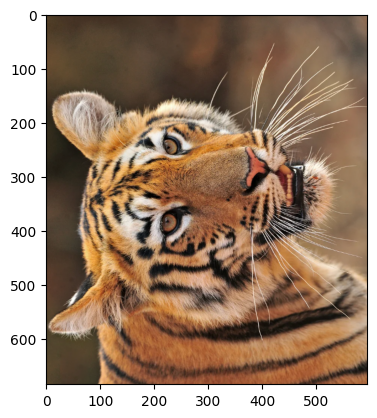

In [6]:
import numpy as np

class dctfDataset(Dataset):
    def __init__(self, csv_file , class_list, transform=None):
        self.df = read_csv("my_label.csv")
        self.transform= transform
        self.class_list = class_list
        
    def __len__(self):
        return self.df.shape[0]
    

    def __getitem__(self, index):
        image = Image.open(self.df.file_path[index])
        label = self.class_list.index(self.df.label[index])

        if self.transform:
            img = self.transform(image)
        return img, label

if __name__ == "__main__":
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    )
    dataset = dctfDataset("my_label.csv", class_list=['dog', 'cat', 'tiger', 'frog'], transform=transform)
    dataloader = DataLoader(dataset=dataset,
                            batch_size=1,
                            shuffle=True,
                            drop_last = False)
    
    for epoch in range(2):
        print(f"epoch : {epoch} ")
        for batch in dataloader:
            img, label = batch
            print(img.size(), label)
            plt.imshow(np.transpose(img[0].numpy()))    #np.transpose(img[0].numpy()) 이미지를 출력하기 위해 shape을 바꿔줘야함.
            plt.show()
            
import matplotlib.pyplot as plt
            

In [8]:
import glob
import torch
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class dctfDataset(Dataset):
    def __init__(self, path, train=True, transform=None):
        self.path = path
        if train:
            self.dog_path = path + '/dog/train'
            self.cat_path = path+ '/cat/train'
            self.tiger_path = path+ '/tiger/train'
            self.frog_path = path+ '/frog/train'
        else:
            self.dog_path = path + '/dog/test'
            self.cat_path = path+ '/cat/test'
            self.tiger_path = path+ '/tiger/test'
            self.frog_path = path+ '/frog/test'
            
        self.dog_img_list = glob.glob(self.dog_path +'/*.PNG')
        self.cat_img_list = glob.glob(self.cat_path +'/*.PNG')
        self.tiger_img_list = glob.glob(self.tiger_path +'/*.PNG')
        self.frog_img_list = glob.glob(self.frog_path +'/*.PNG')
        
        self.transform =transform
        
        self.img_list = self.dog_img_list +self.cat_img_list + self.tiger_img_list + self.frog_img_list
        self.class_list = [0]*len(self.dog_img_list) + [1]* len(self.cat_img_list) + [2]* len(self.tiger_img_list) + [3]*len(self.frog_img_list)
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, idx):
        img_path = self.img_list[idx]
        label = self.class_list[idx]
        img = Image.open(img_path)
        
        if self.transform is not None:
            img = self.transform(img)
            
        return img, label
    
if __name__ == "__main__":
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    )
    dataset = dctfDataset(path='.\data_dogcattigerfrog', train =True, transform = transform)
    dataloader = DataLoader(dataset=dataset,
                            batch_size=1,
                            shuffle=True,
                            drop_last = False)
    
    for epoch in range(2):
        print(f"epoch : {epoch} ")
        for batch in dataloader:
            img, label = batch
            print(img.size(), label)

epoch : 0 
torch.Size([1, 4, 551, 647]) tensor([2])
torch.Size([1, 4, 554, 671]) tensor([3])
torch.Size([1, 4, 551, 674]) tensor([0])
torch.Size([1, 4, 340, 600]) tensor([1])
epoch : 1 
torch.Size([1, 4, 551, 674]) tensor([0])
torch.Size([1, 4, 340, 600]) tensor([1])
torch.Size([1, 4, 554, 671]) tensor([3])
torch.Size([1, 4, 551, 647]) tensor([2])


In [33]:

class dctfDataset(Dataset):
    def __init__(self, path, train=True, transform=None):
        self.path = path
        if train:
            self.dog_path = path + '/dog/train'
            self.cat_path = path+ '/cat/train'
            self.tiger_path = path+ '/tiger/train'
            self.frog_path = path+ '/frog/train'
        else:
            self.dog_path = path + '/dog/test'
            self.cat_path = path+ '/cat/test'
            self.tiger_path = path+ '/tiger/test'
            self.frog_path = path+ '/frog/test'
            
        self.dog_img_list = glob.glob(self.dog_path +'/*.PNG')
        self.cat_img_list = glob.glob(self.cat_path +'/*.PNG')
        self.tiger_img_list = glob.glob(self.tiger_path +'/*.PNG')
        self.frog_img_list = glob.glob(self.frog_path +'/*.PNG')
        
        self.transform =transform
        
        self.img_list = self.dog_img_list  + self.cat_img_list + self.tiger_img_list  + self.frog_img_list
        self.Image_list = []
        for img_path in self.img_list:
            self.Image_list.append(Image.open(img_path))
            
        self.class_list = [0]*len(self.dog_img_list) + [1]* len(self.cat_img_list) + [2]* len(self.tiger_img_list) + [3]*len(self.frog_img_list)
        
    def __len__(self):
        return len(self.Image_list)
    
    def __getitem__(self, idx):
        img = self.Image_list[idx]
        label = self.class_list[idx]
        
        if self.transform is not None:
            img = self.transform(img)
            
        return img, label
    
if __name__ == "__main__":
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
        ]
    )
    train_dataset = dctfDataset(path='.\data_dogcattigerfrog', train =True, transform = transform)
    test_dataset = dctfDataset(path='.\data_dogcattigerfrog', train =False, transform = transform)
    train_dataloader = DataLoader(dataset=train_dataset,
                            batch_size=1,
                            shuffle=True,
                            drop_last = False)
    
    for epoch in range(2):
        print(f"epoch : {epoch} ")
        for batch in train_dataloader:
            img, label = batch
            print(img.size(), label)

epoch : 0 
torch.Size([1, 4, 554, 671]) tensor([3])
torch.Size([1, 4, 551, 674]) tensor([0])
torch.Size([1, 4, 551, 647]) tensor([2])
torch.Size([1, 4, 340, 600]) tensor([1])
epoch : 1 
torch.Size([1, 4, 551, 674]) tensor([0])
torch.Size([1, 4, 340, 600]) tensor([1])
torch.Size([1, 4, 554, 671]) tensor([3])
torch.Size([1, 4, 551, 647]) tensor([2])
